## Quick Links
* [Data Preprocessing](#data-preprocess)
* [Training and Test Sets](#train-test)
* [Feature Scaling](#feature-scaling)
* [K Nearest Neighbors Regression](#knn)
* [Random Forest Regression](#rfr)
* [Ridge Regression](#ridge)
* [Kernelized Ridge Regression](#kridge)
* [Comparing Our Models](#compare)
* [On-line Prediction](#online)

## Necessary Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

## Loading the Dataset

In [2]:
california = pd.read_csv('./Datasets/California Housing Dataset/housing.csv', header = 0)

In [3]:
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Shape of the Dataset

In [4]:
california.shape

(20640, 10)

## Checking Stats of the Dataset

In [5]:
california.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<a id='data-preprocess'></a>
## Checking for missing values

In [7]:
california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Removing rows with missing values

In [8]:
california = california.dropna()

In [9]:
california.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Relationship Betweent the Different Features and with the Label

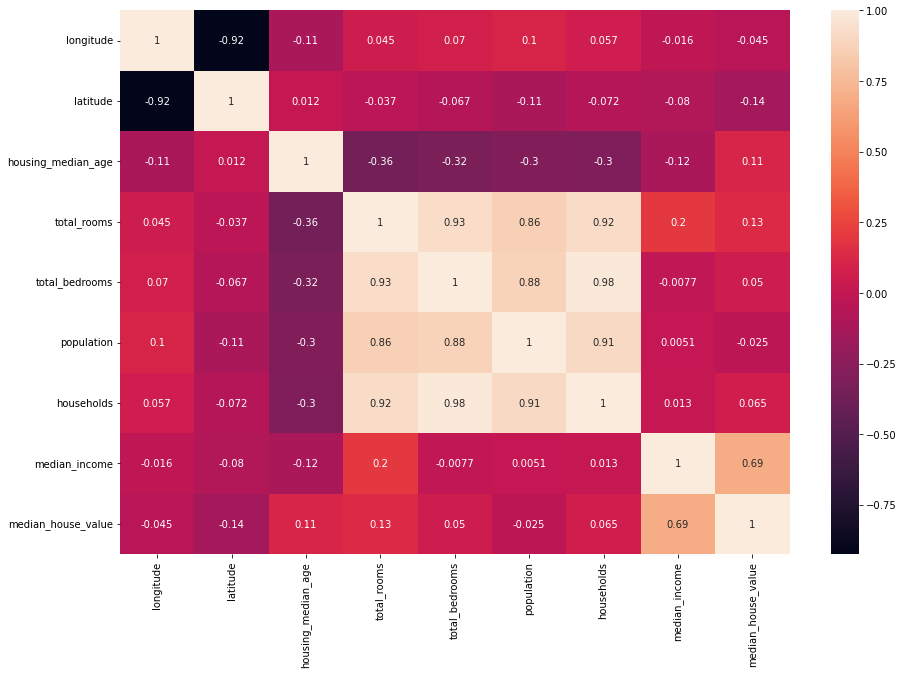

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(california.corr(),annot=True);

## Converting Categorical Variable to Dummy Variables

In [12]:
california['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
california = pd.get_dummies(california)
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Splitting the Data into Features (X) and Target (y)

In [14]:
X_california = california.drop('median_house_value', axis = 1)
X_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [15]:
y_california = california['median_house_value']
y_california.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

<a id='train-test'></a>
## Splitting the Data into Training and Test Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_california,y_california, random_state = 42)

<a id='feature-scaling'></a>
## Normalizing the dataset using StandardScaler

In [17]:
n = X_california.columns.get_loc('median_income') + 1

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:, :n])

StandardScaler()

In [19]:
def custom_transform(X):
    temp = np.copy(X)
    temp[:, :n] = scaler.transform(temp[:, :n])
    return temp

In [20]:
X_train_scaled = custom_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [21]:
pd.DataFrame(X_train_scaled_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.283864,-0.110203,-1.401160,2.831818,3.955622,2.953847,3.754956,-1.137989,0.0,1.0,0.0,0.0,0.0
1,1.307661,-1.371039,-0.844886,-0.097857,-0.005963,-0.257076,0.141842,-0.745415,1.0,0.0,0.0,0.0,0.0
2,0.628459,-1.071063,-0.129677,-0.439637,-0.034653,-0.595577,-0.439215,-0.902697,0.0,0.0,1.0,0.0,0.0
3,1.227755,-1.375726,0.744468,-0.836528,-0.761461,-0.411819,-0.703331,-1.484241,0.0,0.0,0.0,0.0,1.0
4,-1.299277,0.995958,1.141806,-0.280788,-0.304815,-0.272902,-0.344133,-1.043030,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15319,0.803253,-0.897639,-0.368080,0.169825,-0.084860,0.013725,-0.116992,0.818932,1.0,0.0,0.0,0.0,0.0
15320,1.018001,-0.878891,-1.877966,1.492022,1.194228,1.614790,1.330366,0.486207,1.0,0.0,0.0,0.0,0.0
15321,0.578517,-0.761713,1.062338,-0.477149,-0.398057,-0.412698,-0.357338,-0.407322,1.0,0.0,0.0,0.0,0.0
15322,-1.229359,0.906902,-1.321692,1.433206,1.263561,1.771292,1.478271,0.744870,0.0,0.0,0.0,1.0,0.0


In [22]:
X_test_scaled = custom_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [23]:
pd.DataFrame(X_test_scaled_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.167825,-1.333542,-0.685951,-0.770302,-0.615621,-0.788127,-0.642584,-0.362685,0.0,0.0,0.0,0.0,1.0
1,-0.854799,1.113136,-2.116369,1.749978,1.387884,1.675457,1.214155,0.323346,0.0,1.0,0.0,0.0,0.0
2,0.718353,-0.803897,0.188194,0.512531,0.759099,0.783924,0.802133,-0.341682,1.0,0.0,0.0,0.0,0.0
3,-1.244341,1.080326,0.108726,-0.631830,-0.620403,-0.628108,-0.729743,-0.516282,0.0,0.0,0.0,1.0,0.0
4,-1.154447,1.103762,-1.957433,-0.209931,0.147049,-0.433800,-0.095863,0.120426,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.247731,-1.361665,0.585532,-0.679068,-0.759070,-0.705480,-0.698049,-0.137026,0.0,0.0,0.0,0.0,1.0
5105,1.257719,-1.431971,-1.401160,0.117955,0.343097,0.594891,0.464064,-0.189664,0.0,0.0,0.0,0.0,1.0
5106,-0.709969,0.949087,1.141806,-0.118234,-0.292861,-0.419732,-0.198869,-0.320890,0.0,1.0,0.0,0.0,0.0
5107,-1.104505,1.427173,-0.368080,0.541707,0.747145,0.706553,0.968527,-0.561130,0.0,1.0,0.0,0.0,0.0


In [24]:
y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

<a id='knn'></a>
## Fitting K Nearest Neighbors Regression Model to the Dataset

In [27]:
from KNN import KNNRegressor

### Searching for best parameters

In [29]:
best_score = 0.0
best_n_neighbors = 1
best_distance_func = 2
best_weighted = False

n_neighbors = range(1, 6)

start = time.time()
for n in n_neighbors:
    for d in [1,2]:
        for w in [True, False]:
            # Build the model
            knn = KNNRegressor(n_neighbors = n, distance_type = d, weighted = w)
            knn.fit(X_train_scaled_df, y_train)
            current_score = knn.score(X_test_scaled_df, y_test)
            if current_score > best_score:
                best_score = current_score
                best_n_neighbors = n
                best_distance_func = d
                best_weighted = w

                
print(f'\nThat took {np.round((time.time() - start)/60)} minute(s).')                
print(f'\nBest value for n_neighbors: {best_n_neighbors}')
print(f'Best distance function: {best_distance_func}')
print(f'Weighted: {best_weighted}')
print(f'Best Score: {best_score}')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=4, dista

In [30]:
knn_score = best_score
knn_score

0.7346569978090304

In [36]:
# knn_score = 0.7346569978090304
# rr_score = 0.6553892965223076
# krr_linear_score = 0.6541877462647631
# krr_poly_score = 0.7539057131726862
# krr_rbf_score = 0.7534629840467388

### How the scores change with respect to the number of neighbors

In [31]:
train_score = []
test_score = []

neighbors = range(1, 6)

start = time.time()
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = best_distance_func, weighted = best_weighted)
    knn.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(knn.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(knn.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = True)
That took 133.0 minute(s).


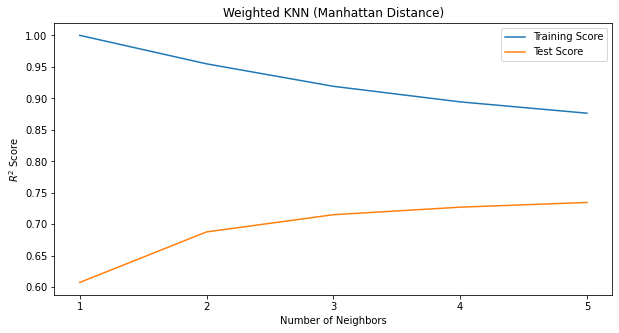

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(n_neighbors, train_score, label = 'Training Score')
ax.plot(n_neighbors, test_score, label = 'Test Score')
ax.set(xlabel = 'Number of Neighbors',
       ylabel = '$R^2$ Score',
       xticks = n_neighbors,
       title = 'Weighted KNN (Manhattan Distance)')
ax.legend();

<a id='rfr'></a>
## Using Random Forest Regression

In [25]:
# Maximum number of features to consider at each node
p = int(np.ceil(X_train.shape[1]/3))

In [26]:
from RFR import RandomForestRegressor

### Searching for the model with the best parameters and best score

In [27]:
best_score = 0.0
best_min_samples_split = 5
best_max_depth = 5

samples = [5, 50, 100]
depths = [10, 20, 25]

start = time.time()
for s in samples:
    for d in depths:
        # Build the model
        rf = RandomForestRegressor(n_estimators = 100, min_samples_split = s, max_depth = d, max_features = p)
        rf.fit(X_train_scaled_df, y_train)
        current_score = rf.score(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_score = current_score
            best_min_samples_split = s
            best_max_depth = d
                
print(f'That took {np.round((time.time() - start)/60)} minute(s).')
        
print(f'\nBest value for min_samples_split: {best_min_samples_split}')
print(f'Best value for max_depth: {best_max_depth}')
print(f'Best Score: {best_score}')

That took 224.0 minute(s).

Best value for min_samples_split: 5
Best value for max_depth: 20
Best Score: 0.8251726491389899


In [28]:
rf_score = best_score
rf_score

0.8251726491389899

### $R^2$ Scores with varying min_samples_split

In [30]:
train_score = []
test_score = []

samples = [5, 100, 150, 200]

start = time.time()
for s in samples:
    # Build the model
    rf = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = s, 
                               max_depth = best_max_depth, 
                               max_features=p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 96.0 minute(s).


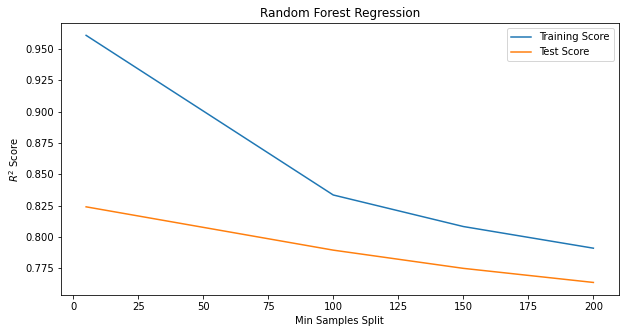

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(samples, train_score, label = 'Training Score')
ax.plot(samples, test_score, label = 'Test Score')
ax.set(xlabel = 'Min Samples Split',
       ylabel = '$R^2$ Score',
       title = 'Random Forest Regression')
ax.legend();

### $R^2$ Scores with varying max_depth

In [33]:
train_score = []
test_score = []

depths = [10, 15, 20, 25]

start = time.time()
for d in depths:
    # Build the model
    rf = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = best_min_samples_split, 
                               max_depth = d, 
                               max_features = p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))

print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 121.0 minute(s).


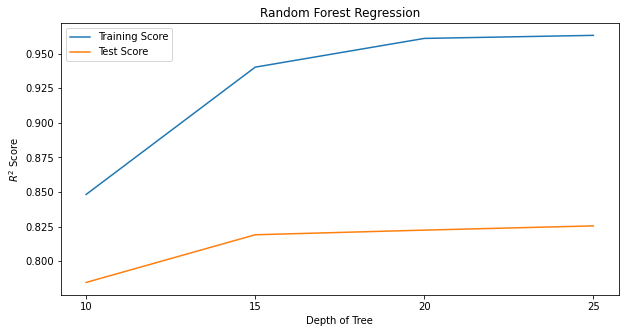

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(depths, train_score, label = 'Training Score')
ax.plot(depths, test_score, label = 'Test Score')
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depths,
       title = 'Random Forest Regression')
ax.legend();

<a id='ridge'></a>
## Using Ridge Regression

In [42]:
from RR import RidgeRegression

In [43]:
best_score = 0.0
best_alpha = 1

alphas = [0.1, 1, 10, 50, 100, 1000]

for a in alphas:
    rr = RidgeRegression(alpha = a)
    rr.fit(X_train_scaled_df, y_train)
    current_score = rr.score(X_test_scaled_df, y_test)
    if current_score > best_score:
        best_score = current_score
        best_alpha = a
        
print(f'\nBest value of alpha: {best_alpha}')
print(f'Best Score: {best_score}')


Best value of alpha: 10
Best Score: 0.6553892965223076


In [ ]:
rr_score = best_score
rr_score

### Checking $R^2$ Scores for Different Alphas

In [44]:
train_score = []
test_score = []

alphas = [0.1, 1, 10, 50, 100, 1000]

for alpha in alphas:
    # Build the model
    reg = RidgeRegression(alpha = alpha)
    reg.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(reg.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(reg.score(X_test_scaled_df, y_test))

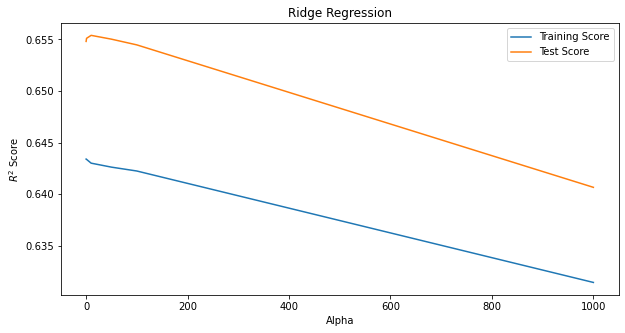

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, train_score, label = 'Training Score')
ax.plot(alphas, test_score, label = 'Test Score')
ax.set(xlabel = 'Alpha',
       ylabel = '$R^2$ Score',
       title = 'Ridge Regression')
ax.legend();

### Weights for the features

In [47]:
rr.coef_

array([-25324.42780243, -25534.06514195,  14190.66364771,    101.4512398 ,
        19226.34876661, -29295.57129859,  15752.986058  ,  68648.30275064,
        12713.24660045, -37306.57258022,    718.45336713,   8970.6698088 ,
        14904.20280385])

### Intercept

In [48]:
rr.intercept_

210017.82010236938

### Displaying the weights in an easily readable format

In [50]:
df = pd.DataFrame(rr.coef_, X_test.columns, columns=['Weights'])
df

,Weights
longitude,-25324.427802
latitude,-25534.065142
housing_median_age,14190.663648
total_rooms,101.451240
total_bedrooms,19226.348767
population,-29295.571299
households,15752.986058
median_income,68648.302751
ocean_proximity_<1H OCEAN,12713.246600
ocean_proximity_INLAND,-37306.572580


<a id='kridge'></a>
## Using Kernelized Ridge Regression

In [51]:
from KernelizedRR import KernelizedRidgeRegression

### Linear Kernel

In [52]:
krr_linear = KernelizedRidgeRegression(kernel='linear', alpha = best_alpha)

In [53]:
krr_linear.fit(X_train_scaled_df, y_train)

In [54]:
krr_linear_score = krr_linear.score(X_test_scaled_df, y_test)
krr_linear_score

0.6541877462647631

### Polynomial Kernel

In [55]:
best_degree, best_coef, best_score = 3, 1, 0.0
start = time.time()
for d in [2, 3, 4, 5, 6]:
    for c in [1, 2, 5, 10, 15]:
        krr = KernelizedRidgeRegression(kernel = 'polynomial', degree=d, coef0=c)
        krr.fit(X_train_scaled_df, y_train)
        current_score = krr.score(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_degree = d
            best_coef = c
            best_score = current_score
            
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

print(f'Best Degree: {best_degree}')
print(f'Best Coef0: {best_coef}')
print(f'Best Score: {best_score}')

That took 29.0 minute(s).
Best Degree: 4
Best Coef0: 2
Best Score: 0.7539057131726862


In [56]:
krr_poly_score = best_score
krr_poly_score

0.7539057131726862

### Radial Basis Kernel

In [57]:
krr_rbf = KernelizedRidgeRegression(kernel='rbf')

In [58]:
krr_rbf.fit(X_train_scaled_df, y_train)

In [59]:
krr_rbf_score = krr_rbf.score(X_test_scaled_df, y_test)
krr_rbf_score

0.7534629840467388

<a id='compare'></a>
## Comparing Our Models

In [37]:
scores = [knn_score, rf_score, rr_score, krr_linear_score, krr_poly_score, krr_rbf_score]
score_labels = ['KNN', 'Random Forest', 'Ridge', 'Linear Kernel', 'Polynomial Kernel', 'Radial Kernel']

In [38]:
# Storing the sort indices 
sort_indices = np.argsort(scores)

In [39]:
# Sorting the scores array
scores = np.sort(scores)

In [40]:
# Sorting the array of labels according to the sort indices for the scores array
score_labels = np.array(score_labels)[sort_indices]

In [41]:
# Array of hexa codes for the bar colors
bar_colors = ['#edf8e9','#c7e9c0','#a1d99b','#74c476','#31a354','#006d2c']

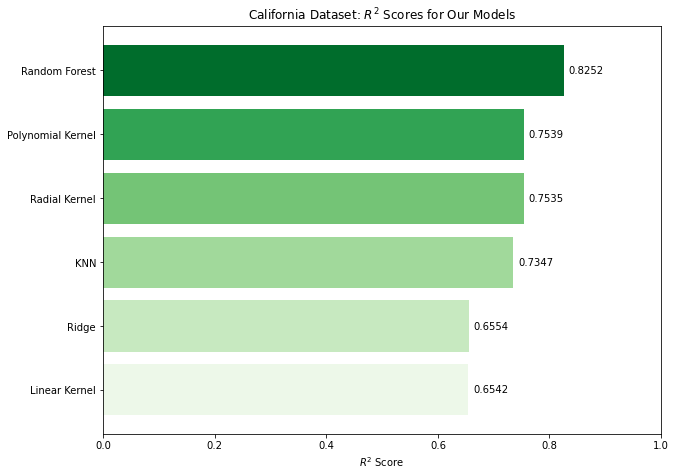

In [42]:
# Plotting R2 Scores for our models
fig, ax = plt.subplots(figsize=(10,7.5))
bars = ax.barh(score_labels, scores, color = bar_colors);
ax.bar_label(bars, fmt='%.4f', padding = 5);
ax.set(xlim = (0,1),
       xlabel ='$R^2$ Score',
       title = 'California Dataset: $R^2$ Scores for Our Models');

<a id='online'></a>
## Online Prediction

In [69]:
from OnlineLR import OnlineLinearRegression

In [71]:
# index upto which we want to fit our scaler
n = X_california.columns.get_loc('median_income') + 1

In [72]:
olr = OnlineLinearRegression(n_features = X_california.shape[1], scale_index = n)
y_preds = []
T = X_california.shape[0]

In [73]:
for t in range(X_california.shape[0]):
    # Observe the sample at time t and make a prediction
    prediction = olr.predict(X_california.iloc[t])
    # Store the prediction that we have made
    y_preds.append(prediction)
    # Calculate Loss and Update Weights
    olr.update_weights(y_california.iloc[t], prediction)

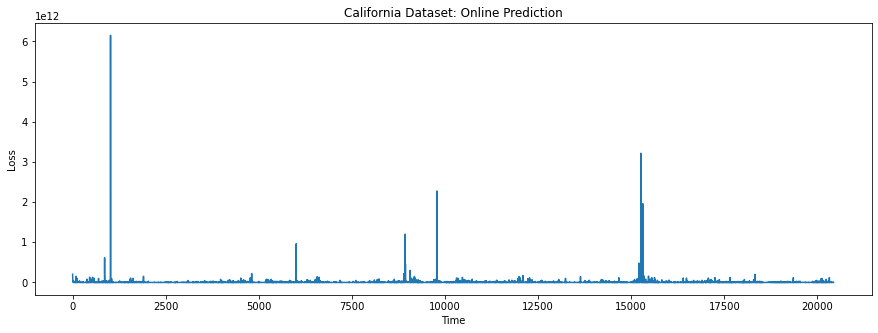

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(olr.losses)
ax.set(xlabel = 'Time',
       ylabel = 'Loss',
       title = 'California Dataset: Online Prediction');

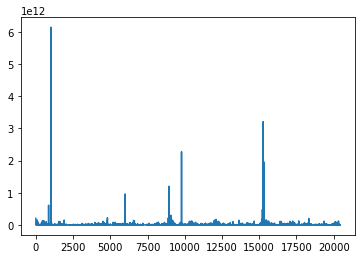

In [75]:
plt.plot(olr.losses)

### Cumulative Loss

In [76]:
olr.cumulative_loss_

106900299526861.34